In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
import numpy as np

In [6]:
d = {'Yes' : 1, 'No' : 0}
df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df['Churn'] = df['Churn'].astype('int64')

In [10]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()
df['State'] = le.fit_transform(df['State'])

ohe = preprocessing.OneHotEncoder(sparse=False)

encoded_state =ohe.fit_transform(df['State'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,
                  columns=['state ' + str(i)
                      for i in range(encoded_state.shape[1])])

df = pd.concat([df, tmp], axis = 1)

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,state 41,state 42,state 43,state 44,state 45,state 46,state 47,state 48,state 49,state 50
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from scipy import stats
from sklearn import model_selection

In [16]:
X = df.drop(['Churn', 'State', 'Area code'], axis=1)
y = df['Churn']

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
X, y, stratify=y, test_size=0.33, random_state=42)

In [21]:
lr = linear_model.LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
lr.coef_

array([[-1.11973735e-04,  2.05510805e+00, -1.49629210e+00,
         1.89380152e-02,  1.27003471e-02, -2.12560006e-03,
        -1.36598582e-02,  4.59402357e-03, -1.28541835e-03,
        -9.12559422e-04,  1.32144657e-04, -6.46240779e-03,
         1.30614507e-02,  3.75492280e-02, -1.57644115e-01,
         3.68062944e-02,  5.02454595e-01, -4.42004260e-01,
        -8.76951260e-01, -1.38573707e-01, -7.87606575e-01,
         8.39913134e-01, -2.70457042e-01,  2.75519933e-01,
        -4.59345109e-01,  1.05534332e-01, -4.04577720e-01,
        -6.63980505e-02, -1.25913116e+00, -1.08620620e-01,
         1.85625624e-01, -6.63440726e-01, -1.75284030e-01,
         2.17090422e-01, -4.03739937e-01, -2.02677773e-01,
         2.40109344e-01,  2.21936839e-01,  1.87983835e-01,
         4.47537738e-01,  3.65938300e-01, -4.08942025e-02,
         3.97783334e-01,  9.11199503e-01, -6.36291404e-02,
        -8.75643870e-01, -5.17794443e-01,  3.00668871e-01,
         5.71320024e-01, -3.31942858e-01,  5.99291026e-0

In [23]:
lr.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
np.array(y_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# так как мы предсказываем класс, то нам не подходит mae или mse

In [30]:
from matplotlib.pylab import rc, plot
from sklearn import metrics
import itertools

Confusion matrix, without normalization
[[910  31]
 [118  41]]


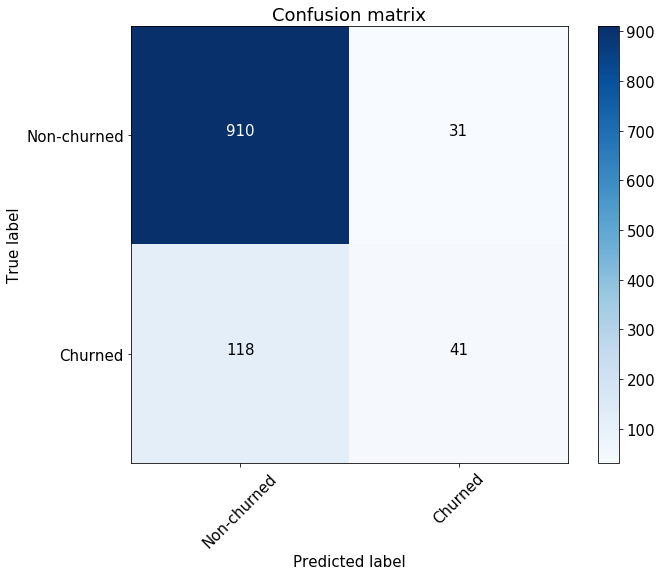

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = metrics.confusion_matrix(y_test, list(map(int, lr.predict_proba(X_test)[:, 1] > 0.5)))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
# plt.savefig("conf_matrix.png")
plt.show()

предсказали , что уйдет , но на самом деле не ушел - ошибка первого рода

предсказали , что не уйдет , но на самом деле  ушел - ошибка второго рода


true negative 910 - правильно предсказали, что принадлежит к классу 0

true positive 118 - правильно предсказали, что принадлежит к классу 1

false positive 41 - неправильно предсказали, что принадлежит к классу 1 (уйдет)

false negative 118 - неправильно предсказали, что принадлежит к классу 0 (не уйдет)


In [34]:
# обычно класс 1 ставят тем, с кем потом хотят работать, 
# то есть в данном случае те, кого хотим удержать, это те, кто уйдет (churn = 1)

In [35]:
accuracy = (41+910) / (910+31+41+118)

In [37]:
accuracy

0.8645454545454545

то есть в 86.5% мы предсказали правильно

In [44]:
# причина в сильном дисбалансе наблюдений по классам, общее accuracy считает по всем классам, 
# поэтому модели просто выгодно сказать, что никто не уйдет

recall (полнота) , precison (точность)  -  оба показателя важны

### F-мера

оптимальный размен между полнотой и точностью
нужно найти идеальное соотношение
(золотое правило механики)

Обычно исходят из бизнес-требований

обычно коэф-т b = 1, это настроечный коэф-т приоритета полноты или точности в зависимости от требований

### ROC-AUC

area under curve

не всегда подходит ф-мера, так как когда есть 2 числа - это всегда размен.

Поэтому нужно одно число, чтобы понять, хорошая модель или нет

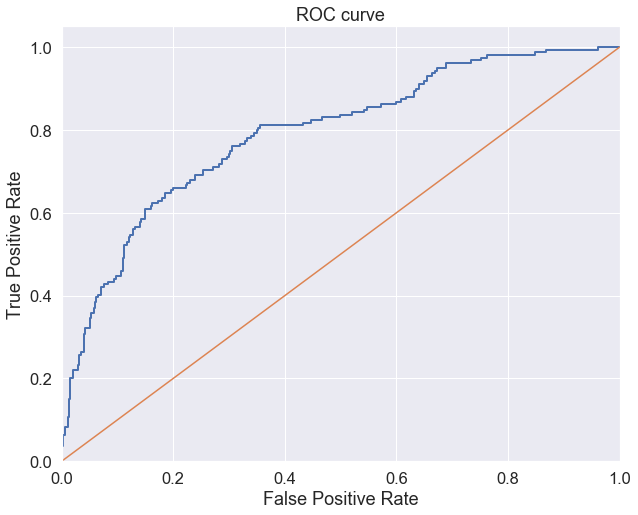

In [47]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [49]:
metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.7910626324196793

In [50]:
# то есть мы получили хорошую модель

### log-loss

эта метрика похожа на mae и mse, но для классификации

сильно наказывает за грубые ошибки при классификации, например в медицинских задачах

как правило, этой метрики нет в бизнес-требованиях, но есть в задачах на kaggle

ошибка вероятности принадлежности к классу

Если сильный дисбаланс классов, то берем roc-auc\

Если много классов, а не просто 1 и 0, то для КАЖДОГО класса считаем свой roc-auc



### Продвинутые регрессионные метрики

пока мы изучали только мае и мсе



#### MSLE

наказывает за ошибки в меньшую сторону больше , чем за ошибки в большую сторону




ДЗ -  придумать обратную метрику

#### R**2 - коэф-т детерминации

сравнивает дисперсию и предикты

например, отклонения по возрасту 5 лет, если наша модель показывает ошибку 6 , то модель плохая